In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Shifting all data from xls format into cleaned up df
team_stats = pd.read_excel("data_files/Lebron_Jordan_Team_Record.xlsx")
team_stats = team_stats.loc[:, ~team_stats.columns.str.startswith("Unnamed")]

team_stats['W/L% without Player'] = round((team_stats['W'] -team_stats['W with Player'] )/ ((team_stats['W'] -team_stats['W with Player'] )+(team_stats['L'] -team_stats['L with Player'])),3)
col_to_move, target_col = "W/L% without Player", "W/L%"
cols = team_stats.columns.tolist()
cols.insert(cols.index(target_col) + 1, cols.pop(cols.index(col_to_move)))
team_stats = team_stats[cols]

lebron_team_stats = team_stats[:22]
jordan_team_stats = team_stats[23:]
team_stats['W/L% without Player'] = team_stats['W/L% without Player'].replace(0, np.nan)
team_stats.head()


,Season,Lg,Team,W,L,W with Player,L with Player,W/L%,W/L% without Player,Finish,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Playoffs,Coaches,Top WS
0,2024-25,NBA,Los Angeles Lakers,24.0,18.0,22.0,17.0,0.571,0.667,1st of 5,-1.15,97.5,-1.5,113.9,0.5,115.4,2.0,NaN,J. Redick (24-18),A. Davis (5.6)
1,2023-24,NBA,Los Angeles Lakers*,47.0,35.0,41.0,30.0,0.573,0.545,3rd of 5,1.07,100.9,2.4,115.9,0.6,115.3,0.0,Lost W. Conf. 1st Rnd.,D. Ham (47-35),A. Davis (11.8)
2,2022-23,NBA,Los Angeles Lakers*,43.0,39.0,30.0,25.0,0.524,0.481,5th of 5,0.43,101.3,2.2,114.5,-0.3,113.9,-0.9,Lost W. Conf. Finals,D. Ham (43-39),A. Davis (9.0)
3,2021-22,NBA,Los Angeles Lakers,33.0,49.0,25.0,31.0,0.402,0.308,4th of 5,-3.08,100.1,1.9,110.3,-1.7,113.3,1.3,NaN,F. Vogel (33-49),L. James (7.5)
4,2020-21,NBA,Los Angeles Lakers*,42.0,30.0,30.0,15.0,0.583,0.444,3rd of 5,2.77,98.7,-0.5,109.9,-2.4,107.1,-5.2,Lost W. Conf. 1st Rnd.,F. Vogel (42-30),M. Harrell (7.3)


In [19]:
winning_percentage_lebron = (lebron_team_stats['W/L%'] < 0.5).sum()
winning_percentage_jordan = (jordan_team_stats['W/L%'] < 0.5).sum()
print(f"Jordan had {winning_percentage_jordan} seasons (out of 15) where his team had a winning record under 0.500. LeBron had {winning_percentage_lebron} seasons (out of 22) where his team had a winning record under 0.500.")

Jordan had 5 seasons (out of 15) where his team had a winning record under 0.500. LeBron had 3 seasons (out of 22) where his team had a winning record under 0.500.


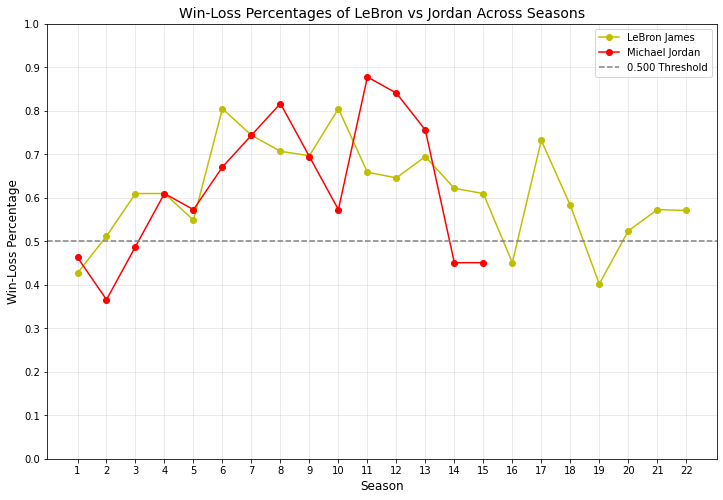

In [26]:
import matplotlib.pyplot as plt

# Extracting W/L% data from the DataFrames
lebron_wl = lebron_team_stats['W/L%'].values  
jordan_wl = jordan_team_stats['W/L%'].values 
lebron_seasons_arr = range(1, len(lebron_wl) + 1)
jordan_seasons_arr = range(1, len(jordan_wl) + 1)


plt.figure(figsize=(12, 8))
plt.plot(lebron_seasons_arr, lebron_wl[::-1], label="LeBron James", color='y', marker='o')
plt.plot(jordan_seasons_arr, jordan_wl[::-1], label="Michael Jordan", color='r', marker='o')
plt.axhline(y=0.5, color='gray', linestyle='--', label="0.500 Threshold")
plt.title("Win-Loss Percentages of LeBron vs Jordan Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Win-Loss Percentage", fontsize=12)
plt.xticks(range(1, max(lebron_seasons, jordan_seasons) + 1))
plt.yticks([i * 0.1 for i in range(11)])
plt.legend()
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

plt.show()


In [15]:
W_L_Lebron = (lebron_team_stats['W/L%'] < lebron_team_stats['W/L% without Player']).sum()
W_L_Jordan = (jordan_team_stats['W/L%'] < jordan_team_stats['W/L% without Player']).sum()
print(f"Jordan had {W_L_Jordan} seasons (out of 15) where his team had a better win rate when he wasn’t playing. LeBron had {W_L_Lebron} seasons (out of 22) where his team had a better win rate when he wasn’t playing.")

Jordan had 0 seasons (out of 15) where his team had a better win rate when he wasn’t playing. LeBron had 5 seasons (out of 22) where his team had a better win rate when he wasn’t playing.


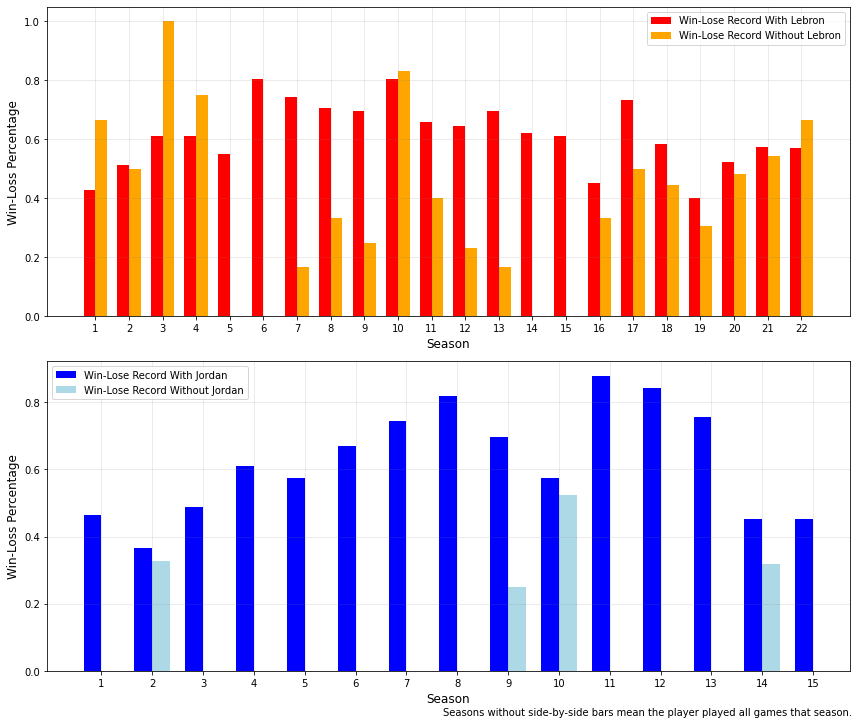

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data for LeBron and Jordan is in the format mentioned earlier
# LeBron's data: W/L% with player and W/L% without player
lebron_wl_with = lebron_team_stats['W/L%'][::-1].values  
lebron_wl_without = lebron_team_stats['W/L% without Player'][::-1].values  

# Jordan's data: W/L% with player and W/L% without player
jordan_wl_with = jordan_team_stats['W/L%'][::-1].values  
jordan_wl_without = jordan_team_stats['W/L% without Player'][::-1].values  

# Create arrays for the x-axis (seasons)
lebron_seasons_arr = range(1, len(lebron_wl_with) + 1)
jordan_seasons_arr = range(1, len(jordan_wl_with) + 1)

# Set up positions for the bars on the x-axis
bar_width = 0.35
# Adjust the positions to spread the bars more evenly
index_lebron = np.linspace(0, len(lebron_wl_with) - 1, len(lebron_wl_with))  # More evenly spread positions for LeBron
index_jordan = np.linspace(0, len(jordan_wl_with) - 1, len(jordan_wl_with))  # More evenly spread positions for Jordan

# Creating two separate subplots for LeBron and Jordan, arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for LeBron (Side-by-Side Bar Chart)
ax1.bar(index_lebron, lebron_wl_with, bar_width, label="Win-Lose Record With Lebron", color='r')
ax1.bar(index_lebron + bar_width, lebron_wl_without, bar_width, label="Win-Lose Record Without Lebron", color='orange')
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Win-Loss Percentage", fontsize=12)
ax1.set_xticks(index_lebron + bar_width / 2)
ax1.set_xticklabels(lebron_seasons_arr)
ax1.legend()
ax1.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Plot for Jordan (Side-by-Side Bar Chart)
ax2.bar(index_jordan, jordan_wl_with, bar_width, label="Win-Lose Record With Jordan", color='b')
ax2.bar(index_jordan + bar_width, jordan_wl_without, bar_width, label="Win-Lose Record Without Jordan", color='lightblue')
ax2.set_xlabel("Season", fontsize=12)
ax2.set_ylabel("Win-Loss Percentage", fontsize=12)
ax2.set_xticks(index_jordan + bar_width / 2)
ax2.set_xticklabels(jordan_seasons_arr)
ax2.legend()
ax2.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Adjust the spacing between the charts
plt.subplots_adjust(hspace=0.2)

# Add annotation to explain the meaning of missing side-by-side bars
fig.text(0.99, 0.00, 'Seasons without side-by-side bars mean the player played all games that season.', ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [42]:
# Find out teammate stats their individual and W-L record 
teammates_df = pd.read_excel("data_files/allnba_teammates.xlsx")
teammates_df.head()

,Player,Season,Age,Team,Lg,Pos,W-L,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Scottie Pippen,1987-88,22.0,CHI,NBA,SF,49-30,79.0,0.0,20.9,...,0.576,1.5,2.3,3.8,2.1,1.2,0.7,1.7,2.7,7.9
1,Scottie Pippen,1988-89,23.0,CHI,NBA,SF,43-30,73.0,56.0,33.1,...,0.668,1.9,4.2,6.1,3.5,1.9,0.8,2.7,3.6,14.4
2,Scottie Pippen,1989-90,24.0,CHI,NBA,SF,55-27,82.0,82.0,38.4,...,0.675,1.8,4.8,6.7,5.4,2.6,1.2,3.4,3.6,16.5
3,Scottie Pippen,1990-91,25.0,CHI,NBA,SF,61-21,82.0,82.0,36.8,...,0.706,2.0,5.3,7.3,6.2,2.4,1.1,2.8,3.3,17.8
4,Scottie Pippen,1991-92,26.0,CHI,NBA,SF,67-15,82.0,82.0,38.6,...,0.760,2.3,5.4,7.7,7.0,1.9,1.1,3.1,3.0,21.0
